# Multi-Layer Perceptron (MLP) on Iris Dataset

## 🧠 Quick Summary

**Goal:** Learn complex, nonlinear decision boundaries using a fully connected neural network.

---

### 🧠 Core Idea:
- An **MLP** consists of input → hidden layer(s) → output.
- Learns using **backpropagation** to minimize cross-entropy loss.
- Capable of capturing **nonlinear** relationships even in small datasets.

---

### 🧮 Hyperparams:
- `hidden_layer_sizes=(100,)`
- `activation='relu'`
- `solver='adam'`
- `max_iter=500`

---

### 🔧 Implications:

| Aspect          | Expectation     | Notes                                                  |
|-----------------|------------------|--------------------------------------------------------|
| Accuracy        | High        | Neural nets fit the Iris dataset very well.            |
| Overfitting     | Low–Moderate     | Overkill for small datasets; can be regularized.       |
| Training Time   | Moderate         | Fast on small data, but iterative.                     |
| Interpretability| Low              | Hard to explain internal weights.                      |
| Nonlinearity    | High             | Can learn complex curved boundaries.                   |

---

### 🔑 Characteristics:
- Good baseline for nonlinear models.
- Sensitive to feature scaling.
- May require tuning of layers, learning rate, and iterations.

## Imports and Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


# experiment helper imports
from sklearn.base import clone
from helpers.base_imports import *

In [3]:
%matplotlib inline

In [4]:
exp = Experiment(
    type="c",  # classification
    name="mlp-iris",
    dataset="iris-20test-shuffled-v1",
)
exp

Loading 'classification-experiments.csv'
Creating experiment: 'mlp-iris'
Loading 'mlp-iris' estimator/model/pipeline


Experiment(c, mlp-iris, iris-20test-shuffled-v1)

## Load dataset

In [5]:
notes, X_train, X_test, y_train, y_test, target_names = get_dataset(exp.dataset)
print(notes)
print(target_names)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Dataset: iris-20test-shuffled-v1
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
Train: 80.00% of total
Test: 20.00% of total
Notes: None
Created by save_dataset() helper at 2024-07-09 12:28:10

  target_names
0       setosa
1   versicolor
2    virginica


((120, 4), (30, 4), (120, 1), (30, 1))

## Fit and evaluate

In [6]:
steps = [
    ("scaler", StandardScaler()),
    ("classifier", MLPClassifier(max_iter=500, random_state=1)),
]

exp.estimator = Pipeline(
    steps=steps,
    memory=CACHE_DIR,
)

In [7]:
exp.estimator.get_params()

{'memory': '.cache',
 'steps': [('scaler', StandardScaler()),
  ('classifier', MLPClassifier(max_iter=500, random_state=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': MLPClassifier(max_iter=500, random_state=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__activation': 'relu',
 'classifier__alpha': 0.0001,
 'classifier__batch_size': 'auto',
 'classifier__beta_1': 0.9,
 'classifier__beta_2': 0.999,
 'classifier__early_stopping': False,
 'classifier__epsilon': 1e-08,
 'classifier__hidden_layer_sizes': (100,),
 'classifier__learning_rate': 'constant',
 'classifier__learning_rate_init': 0.001,
 'classifier__max_fun': 15000,
 'classifier__max_iter': 500,
 'classifier__momentum': 0.9,
 'classifier__n_iter_no_change': 10,
 'classifier__nesterovs_momentum': True,
 'classifier__power_t': 0.5,
 'classifier__random_state': 1,
 'classifier__shuffle': True,
 'classifier__solver': 'adam',
 'classifier__tol

## Hyperparameter tuning

In [8]:
param_grid = {
    "classifier__hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "classifier__alpha": [0.0001, 0.001, 0.01],
    "classifier__activation": ["relu", "tanh"],
    "classifier__solver": ["adam"],
}

# Run GridSearchCV
grid = GridSearchCV(exp.estimator, param_grid, cv=5)
grid.fit(X_train, y_train)

# Store best estimator
exp.estimator = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/

Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50,), 'classifier__solver': 'adam'}
Best Cross-Validation Score: 0.9666666666666668


/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Gridsearch bruteforces optimization of hyperparameters which is fine for small cases like this but other randomized optimization algs may be a better choice for some cases. 

To see under the hood of Gridsearch, we can plot the validation curve per hyperparameter. Useful for diagnosing overfitting issues but not necessary here.

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/

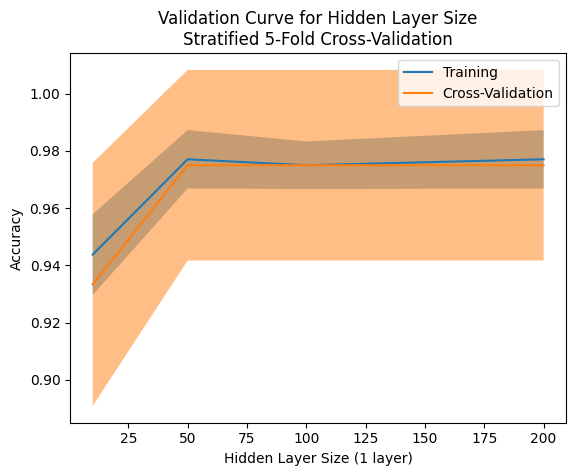

In [9]:
# quick validation curve example to verify gridsearches choice
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
hidden_layer_range = [10, 50, 100, 200]

vcd_hidden = ValidationCurveDisplay.from_estimator(
    estimator=exp.estimator,
    X=X_train,
    y=y_train,
    param_name="classifier__hidden_layer_sizes",
    param_range=hidden_layer_range,
    cv=cv,
)

handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Training", "Cross-Validation"] if "Test" in labels else labels
plt.legend(handles, labels)
plt.xlabel("Hidden Layer Size (1 layer)")
plt.ylabel("Accuracy")
plt.title(
    f"Validation Curve for Hidden Layer Size\nStratified {cv.get_n_splits()}-Fold Cross-Validation"
)
# plt.savefig(f"{FIGS_DIR}/{exp.name}_validation-curve-hidden-layer-sizes.png")
plt.show()

Yep, around 50 is what gridsearch found to be optimal for this dataset.

We would also answer questions about how our model handles different dataset sizes using the learning curve. 

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/

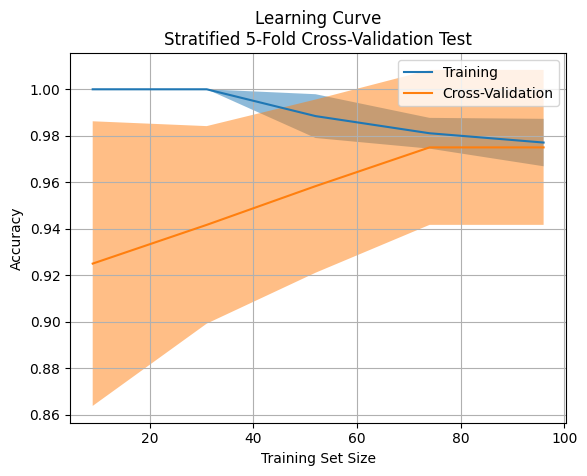

In [10]:
# Plot learning curve using estimator from pipeline
lcd = LearningCurveDisplay.from_estimator(
    estimator=exp.estimator,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=cv,
    random_state=0,
)

# Update the legend to say "Cross-Validation" instead of "Test"
handles, labels = plt.gca().get_legend_handles_labels()
labels = ["Training", "Cross-Validation"] if "Test" in labels else labels
plt.legend(handles, labels)

# Final formatting
plt.title(f"Learning Curve\nStratified {cv.get_n_splits()}-Fold Cross-Validation Test")
plt.ylabel("Accuracy")
plt.xlabel("Training Set Size")
plt.grid(True)
# plt.savefig(f"{FIGS_DIR}/{exp.name}_learning-curve.png")
plt.show()

When training size is very small, an SVM can perfectly memorize the tiny training set (esp with low regularization, C) but as you give it more training data, perfectly fitting every single point is harder so training accuracy goes down but meanwhile validation accuracy goes up and they converge.

This graph shows that the amount of data needed is around 80 samples.

In [22]:
grid.best_params_

{'classifier__activation': 'tanh',
 'classifier__alpha': 0.0001,
 'classifier__hidden_layer_sizes': (50,),
 'classifier__solver': 'adam'}

In [23]:
my_params = grid.best_params_.copy()
exp.estimator.set_params(**my_params)
exp.estimator.get_params()

{'memory': '.cache',
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=500,
                 random_state=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=500,
               random_state=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__activation': 'tanh',
 'classifier__alpha': 0.0001,
 'classifier__batch_size': 'auto',
 'classifier__beta_1': 0.9,
 'classifier__beta_2': 0.999,
 'classifier__early_stopping': False,
 'classifier__epsilon': 1e-08,
 'classifier__hidden_layer_sizes': (50,),
 'classifier__learning_rate': 'constant',
 'classifier__learning_rate_init': 0.001,
 'classifier__max_fun': 15000,
 'classifier__max_iter': 500,
 'classifier__momentum': 0.9,
 'classifier__n_iter_no_change': 10,
 'classifier__nesterovs_momentum': True,
 'classifier__p

In [11]:
# fit on training data
start_time = pd.Timestamp.now()
exp.estimator.fit(X=X_train, y=y_train)
train_time = pd.Timestamp.now() - start_time

/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yarik/vc_projects/ML/machine-learning/.venv-py31013/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
exp.update_param("train_time", train_time)
exp.update_param(
    "mean_accuracy",
    exp.estimator.score(X_test, y_test),
    # add_column=True
)
exp.summary_df

,dataset_name,n_train_samples,n_test_samples,mean_accuracy,train_time,query_time,kfolds,confusion_matrix,classification_report
exp_name,,,,,,,,,
mlp-iris,iris-20test-shuffled-v1,NaN,NaN,0.966667,0 days 00:00:00.084271,NaN,NaN,NaN,NaN


## Take a look at the trained model

In [13]:
# get precision, recall, f1, accuracy
start_time = pd.Timestamp.now()
y_pred = exp.estimator.predict(X_test)
query_time = pd.Timestamp.now() - start_time

In [14]:
exp.update_param("query_time", query_time)

Text(0.5, 1.0, 'Confusion Matrix')

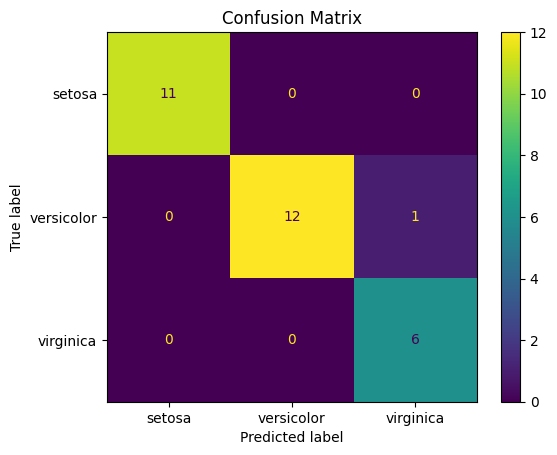

In [15]:
target_names_list = target_names["target_names"].tolist()
cm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    # normalize="true"
)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names_list)
cmd.plot()
plt.title("Confusion Matrix")
# plt.savefig(f"{FIGS_DIR}/{exp.name}_confusion-matrix.png")

In [16]:
y_pred = exp.estimator.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names["target_names"]))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [17]:
exp.update_param("confusion_matrix", np.array2string(cm))

In [18]:
cr = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
exp.update_param("classification_report", str(cr))
cr

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0},
 '1': {'precision': 1.0,
  'recall': 0.9230769230769231,
  'f1-score': 0.96,
  'support': 13.0},
 '2': {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-score': 0.9230769230769231,
  'support': 6.0},
 'accuracy': 0.9666666666666667,
 'macro avg': {'precision': 0.9523809523809524,
  'recall': 0.9743589743589745,
  'f1-score': 0.9610256410256411,
  'support': 30.0},
 'weighted avg': {'precision': 0.9714285714285714,
  'recall': 0.9666666666666667,
  'f1-score': 0.9672820512820512,
  'support': 30.0}}

In [19]:
# add custom decision tree classification specific metrics to the summary_df
exp.update_param(
    "hidden_layer_sizes",
    exp.estimator.get_params()["classifier__hidden_layer_sizes"],
    add_column=True,
)
exp.update_param(
    "alpha",
    exp.estimator.get_params()["classifier__alpha"],
    add_column=True,
)
exp.update_param(
    "activation",
    exp.estimator.get_params()["classifier__activation"],
    add_column=True,
)
exp.update_param(
    "solver",
    exp.estimator.get_params()["classifier__solver"],
    add_column=True,
)

exp.summary_df

Adding column: hidden_layer_sizes
Adding column: alpha
Adding column: activation
Adding column: solver


,dataset_name,n_train_samples,n_test_samples,mean_accuracy,train_time,query_time,kfolds,confusion_matrix,classification_report,hidden_layer_sizes,alpha,activation,solver
exp_name,,,,,,,,,,,,,
mlp-iris,iris-20test-shuffled-v1,NaN,NaN,0.966667,0 days 00:00:00.084271,0 days 00:00:00.006141,NaN,[[11 0 0]\n [ 0 12 1]\n [ 0 0 6]],"{'0': {'precision': 1.0, 'recall': 1.0, 'f1-sc...","(50,)",0.0001,tanh,adam


In [ ]:
exp.save(overwrite_existing=False)